In [ ]:
#Convolution_Example.ipynb
# Simple Notebook to illustrate the idea of how image processing uses kernels to process imgaes
# uses convolution.py from the Convolution-from-scratch repository by Nikita Detkov
# Copyright Jim Smith james.smith@uwe.ac.uk 2023



import numpy as np
import os
from PIL import Image


import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation 
from matplotlib.patches import Rectangle
from convolution import conv2d

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.rcParams['animation.embed_limit']= 201004050
%matplotlib inline

# Convolution from the perspective of image processing
For decades before the invention of 'neocognitrons' (nowadays better known as Convolutional Neural Networks,
Image Processing Experts relied on the concepts of transforming images by moving a small 'kernel' across the image.

The basic idea is to transform the image by using simple local processing which you apply at each different point in the image.
![Illustration of convoltion from wikicommons](https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif)

To illustrate this process we will start by using a hand-drawn number (so we can process it quickly without code optimisations) and a simple vertical edge detector called the Prewitt Filter. (Technically the Prewitt uses vertical and horizontal versions then combines them).

We'll use the terms *kernel* and *filter* pretty much interchangeably

## Get a simple hand-drawn image

In [ ]:
matrix = np.asarray([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,67,232,39,0,0],
                     [0,0,0,0,62,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,120,180,39,0,0],
                     [0,0,0,0,126,163,0,0,0,0,0,0,0,0,0,0,0,0,0,2,153,210,40,0,0],
                     [0,0,0,0,220,163,0,0,0,0,0,0,0,0,0,0,0,0,0,27,254,162,0,0,0],
                     [0,0,0,0,222,163,0,0,0,0,0,0,0,0,0,0,0,0,0,183,254,125,0,0,0],
                     [0,0,0,0,46,245,0,0,0,0,0,0,0,0,0,0,0,0,0,198,254,56,0,0,0],
                     [0,0,0,0,120,254,0,0,0,0,0,0,0,0,0,0,0,0,23,231,254,29,0,0,0],
                     [0,0,0,0,159,254,0,0,0,0,0,0,0,0,0,0,0,0,163,254,216,16,0,0,0],
                     [0,0,0,0,159,254,0,0,0,0,0,0,0,0,0,14,86,178,248,254,91,0,0,0,0],
                     [0,0,0,0,159,254,35,0,0,47,49,116,144,150,241,243,234,179,241,252,40,0,0,0,0],
                     [0,0,0,0,150,253,237,207,207,207,253,254,250,240,198,143,91,28,233,250,0,0,0,0,0],
                     [0,0,0,0,119,177,177,177,177,177,98,56,0,0,0,0,0,102,254,220,0,0,0,0,0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,254,137,0,0,0,0,0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,254,57,0,0,0,0,0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,254,57,0,0,0,0,0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,255,94,0,0,0,0,0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,254,96,0,0,0,0,0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,254,153,0,0,0,0,0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,255,153,0,0,0,0,0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,96,254,153,0,0,0,0,0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

#matrix dimensions
raw_height= matrix.shape[0]
raw_width=matrix.shape[1]

### Then visualise it


In [ ]:
print(f'matrix shape {matrix.shape}')
fig,ax=plt.subplots(1,1,figsize=(4,4))
ax.imshow(matrix,cmap='Greys_r')
plt.show()

## Simple version that does convolution explicitly and plots it out

Demonstrate with a simple vertical edge detector that looks at the average of the diference between the pixels on the left and those to  the right of where the filter is on the raw image.

Define a  3 x 3 kernel:

![vertical filter](./images/simple_kernel.png)


- Make a blank new image
- Ignoring a 1 pixel wide border around the edges of the original image:
- Centre a 3 x 3 mask over each pixel of original image in turn:  
  - Call this the **subimage** 
  - multiply each pixel value in the subimage by the weight in the corresponding position in the kernel
  - add up result and put it into the position of the middle pixel **in the new image**




In [ ]:
#kernel dimensions
kernel = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])
k_width= kernel.shape[1]
k_height= kernel.shape[0]

Since we put the result of our calculations into the pixel in the middle, we lose a border around the edge of the raw image.
- This is one pixel thick for a 3x3 kernel,
- 2 kernels thick for a 5x5 kernel
- and so on for rectangular kernels

In [ ]:
lost_y = k_width//2 
lost_x= k_height//2 

new_width= raw_width- 2*lost_x
new_height= raw_height-2*lost_y

print(f'original image size {raw_width} by {raw_height}\n'
      f'kernel size {k_width} by {k_height}\n'
      f'so new image size is {new_width} by {new_height}\n'
      f'x and y lost borders are {lost_x} and {lost_y} pixels thick'
     )

### Start by making arrays to hold the subimage and new image we are creating

In [ ]:
sub_image = np.zeros((k_width, k_height),dtype='uint8')
new_image = np.zeros((new_height,new_width),dtype='uint8')

### Create three subplots to show our results on 
- left image is original  
  with a yellow box showing where the kernel is at the moment
- middle box shows the sub-image under the current position  
  and in the title we show the calculated value 
- right hand box shows the transformed image as we build it up 

Notes:
1. These boxes have different scales!  
2. To use the matplotlib animate function we create handles 'a1,a2,a3' to the things that we want to be changed within each subimage as we do the convolution

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(10,5))

#show raw image
ax[0].imshow(matrix,cmap='gray',vmin=0,vmax=255)
#add yellow outline of kernel position
a0= ax[0].add_patch(Rectangle([0,0 ], k_width, k_height, fill=False, edgecolor='yellow', lw=2))

#middle shows the subimage lying under the current kernel position
a1=ax[1].imshow(sub_image,cmap='gray',vmin=0,vmax=255)
#we'll also show the corresponding kernel values in red
for subx in range (k_width):
    for suby in range (k_height):
        text2= ax[1].text(suby, subx, kernel[subx, suby],
                       ha="left", va="bottom", color="r")
        
#right image shows the transformed image        
        
a2= ax[2].imshow(new_image,cmap='gray',vmin=0,vmax=255)

### code that does step-by step convolution
- init() function needed by FuncAnimation()
- then convolution  to get new value for one pixel and update the animation

In [ ]:
def init():
    ''' show original image to start the animation'''
    a0.set(x=-1,y=-1)
    a1.set_data(sub_image)
    a2.set_data(new_image)
    return a0,a1,a2

In [ ]:

def animate_convolution_step(i):
    '''
    Performs one step of convolution for each step(i)
    - Translates i into pixel co-ordinates x,y
    - Gets subimage centred on that pixel
    - Multiplies by kernel
    - Puts sum into  feature_map pixel x,y
    And updates images
    '''
    #Step 1: get co-ords for next frame
    x = i% new_width
    y= i//new_width
    

    #Step 2: move  coloured box on the original image
    a0.set(y=y-lost_y,x=x-lost_x)
    ax[0].set_title(f'BB: {a0.get_xy()}')

    # Step 3 extract sub_image - same size as kernel 
    sub_image=np.zeros((k_height,k_width),dtype=int)
    for suby in range(k_height):  #loop over rows of kernel
        ypixel= (y- lost_y)  +suby #  ypixel are in original image co-ordinates
        for subx in range (k_width):         #loop over columns
            xpixel = (x -lost_x)  + subx #original image co-ords
            sub_image[suby][subx] = matrix[ypixel][xpixel] #make the copy

    #update middle display
    a1.set_data(sub_image)

    #Step 4 perform element-wise multiplication
    result = kernel * sub_image
    
    #linear sum to get pixel value for new image
    new_pixel_val = result.sum()
    new_pixel_val= np.clip(new_pixel_val,0,255)
    ax[1].set_title(f'computed value {new_pixel_val}')

    #update,  then display new image
    new_image[y][x]=int(new_pixel_val)
    a2.set_data(new_image)
    
    #return the three transformed parts of the output image
    return a0, a1, a2

### Now run the animation

In [ ]:

new_image = np.zeros((new_height,new_width),dtype='uint8')
animation.FuncAnimation(fig, animate_convolution_step, init_func=init, frames=new_height*new_width-1, interval=5, blit=True)



## Here's some other example kernels

In [25]:
# The two edge detectors that combine to make Prewitt's filter
vertical_kernel = np.array ([[1,0,-1],
                             [1,0,-1],
                             [1,0,-1]],dtype=int
                          )
horizontal_kernel = np.array ([[1,1,1],
                               [0,0,0],
                               [-1,-1,-1]],dtype=int
                          )
# A smoothing or averaging filter
mean_pool5 = np.ones((5,5))/25

#An example of a filter that responds to a specific shape
corner_kernel = -1*np.ones((5,5),dtype=int)
corner_kernel += 2*np.array([[0,1,0,0,0],
                             [0,1,0,0,0],
                             [0,1,0,0,0],
                             [0,1,1,1,1],
                             [0,0,0,0,0]])

kernels= (vertical_kernel, horizontal_kernel, mean_pool5,corner_kernel)
k_names = ('vertical','horiz','mean pooling 5x5','corner')

for i in range(len(kernels)):
    print(f' {k_names[i]}\n{kernels[i]}')

 vertical
[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]
 horiz
[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]
 mean pooling 5x5
[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]
 corner
[[-1  1 -1 -1 -1]
 [-1  1 -1 -1 -1]
 [-1  1 -1 -1 -1]
 [-1  1  1  1  1]
 [-1 -1 -1 -1 -1]]


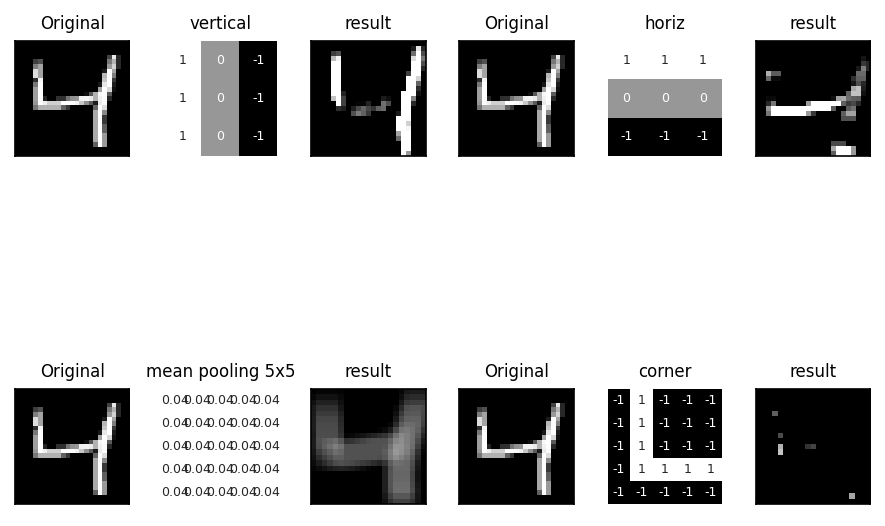

In [32]:
fig,axs = plt.subplots(nrows=len(kernels)//2,ncols=6, figsize=(6,6))
for i in range(len(kernels)):
    row = i//2
    col =  3*(i%2)  #position. in outputr array
    #show original
    axs[row][col+0].imshow(matrix,cmap='gray', vmin=0, vmax=255)
    axs[row][col+0].set_title('Original',fontsize=8)
    axs[row][col+0].tick_params(left=False, bottom=False)
    
    #show kernel
    sns.heatmap(kernels[i], cbar=False, annot=True, annot_kws={"size": 6},square=True, cmap='Greys_r', vmin=-1, ax=axs[row][col+1])
    axs[row][col+1].set_title(k_names[i],fontsize=8)
    
    #transformed image
    output = conv2d(matrix, kernels[i])
    output=np.clip(output,0,255)
    axs[row][col+2].imshow(output, cmap='gray', vmin=0, vmax=255)
    axs[row][col+2].set_title("result",fontsize=8)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
fig.tight_layout()
plt.show()

# The maths of how convolutional filters work

### Preliminaries:
For ease assume a 3 x 3 kernel *k*, and index cells from 1 to 9 (starting with the top row and going left to right)
i.e.
|  | | |
|---|---|----|
| 1 | 2 | 3 |
| 4 | 5 | 6 |
| 7 | 8 | 9 |

and use *K* for the kernel and $s[i]$ for the sub-image centred on pixel $i$

So at each point $i$ we calculate

$ newimage[i] = k_1s[i]_1 +k_2s[i]_2 +k_3s[i]_3 + k_4s[i]_4 + k_5s[i]_5 + k_5s[i]_5 + k_6s[i]_6 + k_7s[i]_7 + k_8s[i]_8 + k_9s[i]_9$

which for short (and to let us generalise to **n= height x width** sized kernels) we write as

$newimage[i] = \sum_{j=1}^n k_j s[i]_j $
 

### Dot Product
But $d = \sum_{j=1}^n k_j s[i]_j $this is exactly the form for the scalar (dot) product of two vectors $k$ and $s[i]$ in k-dimensional space

![dot product of vectors](images/dotproduct.jpg)

And since $-1 \leq cos(\theta) \leq 1$, the value $d = |k| . |s[i]| . cos(\theta)$ is going to be biggest when $cos(\theta)=1$ which happens when the two vectors are pointing in exactly the same direction.

**In other words, the output at a pixel is going to be biggest when the subimage is some constant (scalar) scalar multiple of the kernel**

**So each filter can be thought of as a feature detector,**
- and the output of convolving an image with a filter is sometimes called a *feature map*
- where at each point the outpout corresponds to the quality of the match between the local subimage and the filter

### Terminology
- A *scalar* is a single value with no dimension
- A *vector* is a combination of $n \geq2$ values that can be thought of as having a direction in *n-D* space
- The *norm, |v|* of a vector *v* is its length  
  - Typically we use $L_2$ norm, which is calculated as the square root of the sum of squared (hence $L_2$ values its components $ L_2(v) = \sum_{i=1}^n v_i^2$
  - This is the famous Pythagor;'s Theorm about the  *length of the Hypotenuse* you learned about at school

### Relationship to perceptrons

You may have noticed that the equation forthe dot product looks identical to how we calculate the input to a perceptron.

The difference is that a perceptron is usually connected to all the inputs, or to nodes in the previous layer,
- so it has many more weights,
- even in our  hand-writtn number example the would be 28x28-784 weights to learn

In contrast  in a Convolutional Neural Network, a node has fewer weights 
 - just those for its 'receptive field' (9 in our case),
 - and the same few weights are applied repeatedly to different sub-regions of the inputs.
 
This difference means we can have more nodes in a convoltional layer - or more layers,
for the same amount of data to learn from.

# So that is how digital image processing used to work

Different filters were hand-designed to  do different things
- horizontal / vertical edge detection
- smoothing (averaging)
- texture detection

Features can operate on color (three-channels): just add a third dimension to the kernel and apply it to the same subimage for each channel

There is no reason why we need restrict ourselves to linear combinations like sums
- could use max, range, variance, thresholding of result from multiplying subimage by kernel
- lets us do things like thresholding, erosion, dilation, 

We can make combinations of filters, and feed the output from one filter into another.

### Image Processing Experts made lots of money ! 
- designing transformations for specific applications
- doing things like segmenting images into regions
- so we could then apply ML based on the content

### Was there a better way?

## Example: Using Interactive EAs to evolve filter combinations and weightings:
O. Pauplin, P. Caleb-Solly, and J.E. Smith.  *User-Centric Image Segmentation using an Interactive Parameter Adaptation Tool.*   
Pattern Recognition, 43(2):519–529, February 2010.   DOI 10.1016/j.patcog.2009.03.007O. 
[pdf](https://doi.org/10.1016/j.patcog.2009.03.007)   
(Figs 1-3 show how the EA works, Fig 4 the user interface for scoring evolved filters)

Describes work done on an EU-funded project with people like Sony on vision systems for product quality control. 
This is where my interest in interactive AI (EAs and ML) really kicked in:
- non-experts may not be able to define image processing kernels
- but they can certainly say which combinations are better/worse  
  at highlighting things they are interested in!
- typically <20 interactions to 'evolve' combinations of kernels to segment 'regions of interest' from scratch.

### This became part of a bigger hybrid system, but still got trained separately to the ML part
i.e. Evolutaionary algorithm to tune first ferw convoltional laters, then various ML algorithms on top of that

# Convolutional Networks the key idea: End-to-End training

Nodes in first few layers of network use convolution
- lots fewer weights to learn for each node
- nodes often called filters

Layers of progressively more complex filters get applied to 'feature maps' created by earlier layers
-  'max pooling' (kernel of ones with 'max' operator):  
   effectively says *there was a feature detected somewhere in this kxk area*
   
Finally *flatten* the n-dimensional feature maps into one long array

Then apply fully connected nodes over the top to do classification/ regression
- i.e. a multi-layer perceptron takes the output from the final convoltional latyer as its inputs.

### Optimise all the weights (convolutional and fully connected nodes) with Stochastic Gradient Descent (like any ANN)








